# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha(\frac{2}{n}X^T(Xw - y) - \frac{2}{C}w)  $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь:***
$$ \nabla_{w}Q_{MSE}(w_{old}) = \frac{1}{n}\sum_{i=1}^{n} \nabla_{w}L(w_{old}, x_{i}, y_{i}) = \frac{2}{n}\sum_{i=1}^{D} \sum_{j=1}^{n}(\boldsymbol{wx_{j}} - y_{j})x_{j} = \frac{2}{n}\sum_{i=1}^{D}(Xw - y)x^T_{i} = \frac{2}{n}X^T(Xw - y)$$
$$ \nabla_{w}Q_{L_{2}}(w_{old}) = \nabla_{w}\frac{1}{C}\sum_{i=1}^{D}w_{j}^2 = \frac{2}{C}w$$
$$ \nabla_{w}Q = \nabla_{w}(Q_{L_{2}}(w_{old}) + Q_{MSE}(w_{old})) $$

Сумма весов + усредненное отличие таргета от результата алгоритма

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:


 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ \nabla_{w}Q_{Log}(w_{old}) = \frac{1}{n}\sum_{i=1}^{n} \nabla_{w}L(w_{old}, x_{i}, y_{i}) =  \nabla_w\frac{1}{n}\sum_i^n (y_i \log \frac{1}{1+e^{-\boldsymbol{x_iw}}}) + ( 1 - y_i) \log (1 - \frac{1}{1+e^{-\boldsymbol{x_iw}}})) =\quad ...  $$
Воспользуемся преимуществами технического прогресса
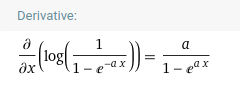 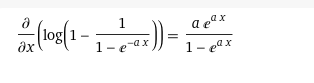
Откуда получим:


$$ ...\quad = \frac{1}{n}\sum_i^n (y_i \vec{x_i} - \vec{x_i} \sigma(\vec{x_i}\vec{w}) = -\frac{1}{n}\sum_i^n (\vec{x_i}(y_i - \sigma(\vec{x_i}\vec{w})) = \frac{1}{n}\sum_i^n (\vec{x_i}(y_i - \sigma) = -\frac{1}{n} X^T(\vec y - \sigma)$$
Откуда и получаем ответ:
$$ w_{new} = w_{old} + \frac{\alpha}{n} X^T(\vec{y} - \sigma) - \frac{2\alpha}{C}\vec{w}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $.

* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
Из лекции: 
$ (X^TX)w - X^TY = 0 $, откуда $\nabla_{w} = X^TX, (A^TAx, x) = (Ax, Ax) >= 0$. Матрица $C = X^TX$ положительно определенная матрица => минимум

C регуляризацией имеем:
$ w = (X^TX + \frac{1}{C}E)^{-1}X^TY$ где E - единичная матрица, что дает обратимость матрицы. =>
L2 прибавляет к общей матрице единичную матрицу с каким-то ненулевым коэффициентом

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$ \frac{\partial E(L|x_i)}{\partial a} = -\frac{p[y_i == 1]}{a} + \frac{p[y_i == 0]}{1 - a} = -\frac{(1-a)p[y_i == 1] - a p[y_i == 0]}{a(1-a)} = -\frac{p[y_i == 1] - a}{a(1-a)} = 0 <=> p[y_1 == 1] = a $$

$$ \frac{\partial^2E(L|x_i)}{\partial a^2} = \frac{a^2 - 2ap_1 + p_1}{(1-a)^2a^2} > 0\;\;при\;a\;= \;p_1,\; так \;как\; a,p_1 \in (0, 1) $$
Получается, что имеем минимум

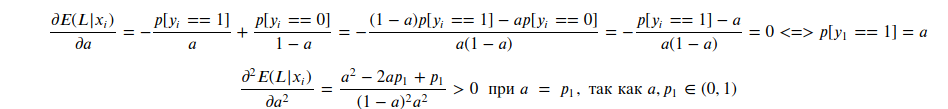

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Не нужно. По сути свободный член является просто константой (общим смещением) и не коэффициентом какого-то признака. В L мы же боремся с весами признаков (чтобы маленькое изменение признака не портило всю картину в случае большого веса)

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам ***не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
from sklearn.utils import shuffle
def batch_generator(X, y, should_shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if should_shuffle == True:
        X, y = shuffle(X, y)
    for i in range(y.shape[0] // batch_size):
        X_batch = X[i * batch_size: (i+1) * batch_size]
        y_batch = y[i * batch_size: (i+1) * batch_size]
        yield (X_batch, y_batch)
    if y.shape[0] % batch_size != 0:
        yield (X[-(y.shape[0] % batch_size):], y[-(y.shape[0] % batch_size):])

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

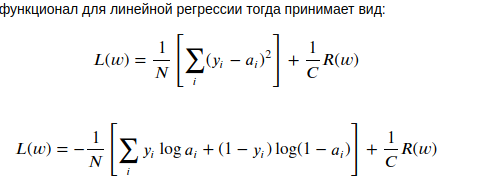

In [7]:
#%%pycodestyle

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=50, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
      
    
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        y_pred = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            loss = y_batch * np.log(sigmoid(y_pred))
            loss += (1 - y_batch) * np.log(sigmoid(1 - y_pred))
            loss = -np.mean(loss)
        elif self.model_type == 'lin_reg':
            distance = y_batch - y_pred
            loss = np.mean(distance * distance)
        else:
            assert("Wrong model type...")

        loss += 1 / self.C * np.dot(self.weights, self.weights)
        
        return loss

    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        y_pred = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            loss_grad = -1 / y_batch.shape[0] * np.dot(X_batch.T, y_batch - sigmoid(y_pred))
        elif self.model_type == 'lin_reg':
            loss_grad = 2 / y_batch.shape[0] * np.dot(X_batch.T, y_pred - y_batch)
            
        loss_grad += 2 / self.C * self.weights   #L2                
        return loss_grad
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
      
        self.weights -= self.alpha * new_grad
    
    
    def fit(self, X, y):
        """
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        """
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(size=X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
      
        
    def predict(self, X):
        """
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        y_pred = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            y_pred = sigmoid(y_pred)
            return y_pred > 0.5
        return y_pred > 0

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(lin_w, log_w):
    boundaries = plt.axis()
    k = -lin_w[0] / lin_w[1]
    plt.plot([-1, 1], [k * -1, k * 1], label='lin_reg')
    k = -log_w[0] / log_w[1]
    plt.plot([-1, 1], [k * -1, k * 1], label='log_reg')

0.9016018306636155
[ 0.36209882 -0.17947537]
0.8944954128440368
[ 0.98131391 -0.61776206]


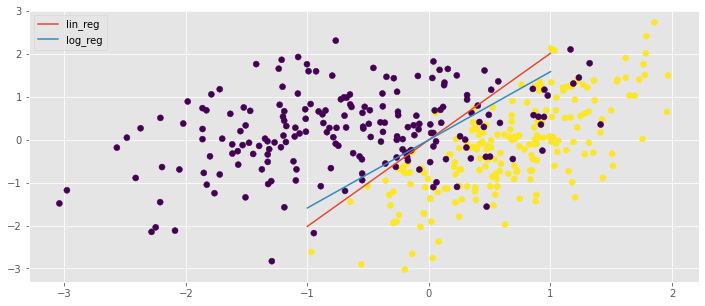

In [9]:
from sklearn.metrics import f1_score

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=16),  max_epoch=20, model_type='lin_reg')
clf.fit(X, y)
y_pred = clf.predict(X)

print(f1_score(y_pred, y))
print(clf.weights)
lin_weights = clf.weights

clf = MySGDClassifier(batch_generator = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=16),  max_epoch=20, model_type='log_reg')
clf.fit(X, y)
y_pred = clf.predict(X)

print(f1_score(y_pred, y))
print(clf.weights)
log_weights = clf.weights

plot_decision_boundary(lin_weights, log_weights)

plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis = 0)
alphas = [0.01, 0.05, 0.1, 0.15, 0.2]
N = 5
lin_results = []
log_results = []

In [13]:
for alpha in alphas:
    b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
    clf_lin = MySGDClassifier(batch_generator=b_gen, alpha=alpha, max_epoch=5, model_type='lin_reg')
    clf_lin.fit(X, y)
    loss_log = np.asarray(clf_lin.errors_log['loss']).reshape(-1, N)
    loss_log = np.mean(loss_log, axis=1)
    lin_results.append(loss_log)

In [14]:
lin_results = np.asarray(lin_results)
loss_steps = np.arange(1, loss_log.shape[0]+1)

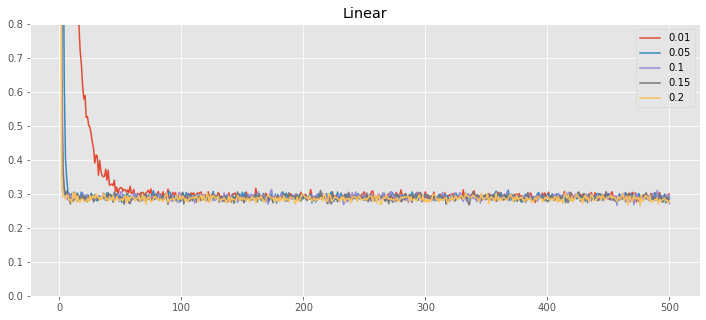

In [15]:
plt.figure()
plt.ylim(0, 0.8)
for alpha, loss in zip(alphas, lin_results):
    plt.plot(loss_steps, loss, label=str(alpha))
plt.legend()
_ = plt.title('Linear')

In [16]:
for alpha in alphas:
    b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
    clf_log = MySGDClassifier(batch_generator=b_gen, alpha=alpha, max_epoch=5, model_type='log_reg')
    clf_log.fit(X, y)
    loss_log = np.asarray(clf_log.errors_log['loss']).reshape(-1, N)
    loss_log = np.mean(loss_log, axis=1)
    log_results.append(loss_log)

In [17]:
log_results = np.asarray(log_results)
loss_steps = np.arange(1, loss_log.shape[0]+1)

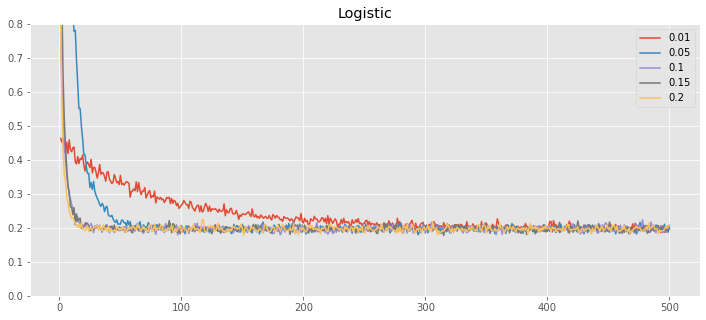

In [18]:
plt.figure()
plt.ylim(0, 0.8)
for alpha, loss in zip(alphas, log_results):
    plt.plot(loss_steps, loss, label=str(alpha))
plt.legend()
_ = plt.title('Logistic')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

***ОТВЕТ:*** Маленькие альфы нужны, а большие нет

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [19]:
C_test = np.logspace(3, -3, 10)

In [20]:
weight_means = []
for c in C_test:
    b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
    clf_lin = MySGDClassifier(batch_generator=b_gen, C=c, alpha=0.0001, max_epoch=5, model_type='lin_reg')
    clf_lin.fit(X, y)
    weight_means.append(np.mean(clf_lin.weights))


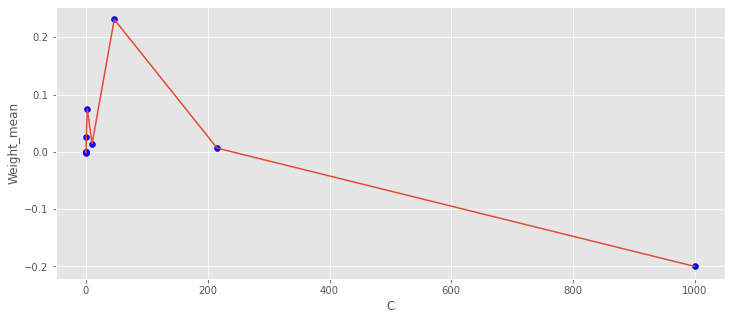

In [21]:
plt.plot(C_test, weight_means)
plt.scatter(C_test, weight_means, c='blue')
plt.xlabel('C')
_ = plt.ylabel('Weight_mean')

In [22]:
weight_means = []
for c in C_test:
    b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
    clf_lin = MySGDClassifier(batch_generator=b_gen, C=c, alpha=0.0001, max_epoch=5, model_type='log_reg')
    clf_lin.fit(X, y)
    weight_means.append(np.mean(clf_lin.weights))

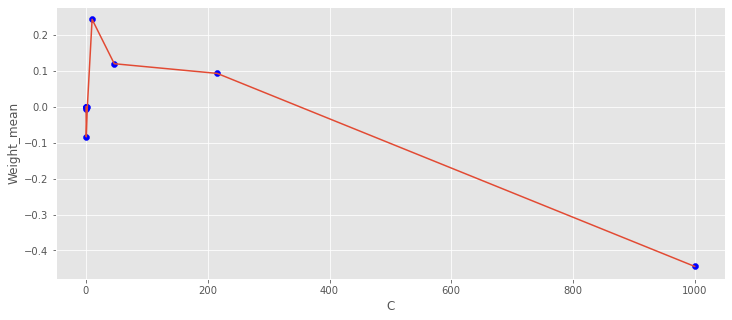

In [23]:
plt.plot(C_test, weight_means)
plt.scatter(C_test, weight_means, c='blue')
plt.xlabel('C')
_ = plt.ylabel('Weight_mean')

In [24]:
weight_means

[-0.4448935592675311,
 0.0936314760332699,
 0.12062843326624546,
 0.24441237568535942,
 -0.0009544534595099241,
 -0.08346204694013569,
 -0.004736844160522105,
 -0.0003249411926028761,
 -7.408416399162459e-05,
 -1.618668135980026e-05]

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [25]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [26]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
train_data.head()

,pair_id,group_id,doc_id,target
0,1,1,15731,0
1,2,1,14829,0
2,3,1,15764,0
3,4,1,17669,0
4,5,1,14852,0


In [27]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [28]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [29]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [31]:
from sklearn.model_selection import KFold, cross_val_score
def find_optimal_linear(X, y):
    
    alphas = [0.0001, 0.001, 0.03, 0.04, 0.05, 0.1]
    C_test = [50, 100, 200, 500, 1000, 10000]
    
    results = pd.DataFrame(index = alphas, columns = C_test)
    
    for alpha in alphas:
        for C in C_test:
            b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
            clf_lin = MySGDClassifier(batch_generator=b_gen, alpha=alpha, C=C, max_epoch=50, model_type='lin_reg')
            results.at[alpha, C] = np.mean(cross_val_score(clf_lin, X, y, scoring='accuracy', cv=4))
    return results      

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [32]:
res = find_optimal_linear(X_train, y_train)

/home/dmitrii/.local/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-7-eb931ae905a6>:43: RuntimeWarning: overflow encountered in multiply
  loss = np.mean(distance * distance)
/home/dmitrii/.local/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-7-eb931ae905a6>:43: RuntimeWarning: overflow encountered in multiply
  loss = np.mean(distance * distance)
/home/dmitrii/.local/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-7-eb931ae905a6>:43: RuntimeWarning: overflow encountered in multiply
  loss = np.mean(distance * distance)
/home/dmitrii/.local/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered i

In [33]:
res

,50,100,200,500,1000,10000
0.0001,0.57399,0.578446,0.606842,0.550313,0.613093,0.519939
0.0010,0.633705,0.649955,0.620698,0.637899,0.647136,0.629597
0.0300,0.748759,0.746535,0.740719,0.735844,0.738322,0.734731
0.0400,0.746193,0.74876,0.746107,0.737554,0.74166,0.736355
0.0500,0.744225,0.743114,0.745765,0.75124,0.744312,0.741487
0.1000,0.712489,0.712489,0.712489,0.712489,0.712489,0.712489


In [34]:
res.values.max()

0.751240398379301

In [35]:
def find_optimal_logistic(X, y):
    
    alphas = [0.0001, 0.001, 0.03, 0.04, 0.05, 0.1]
    C_test = [50, 100, 200, 500, 1000, 10000]
    
    results = pd.DataFrame(index = alphas, columns = C_test)
    
    for alpha in alphas:
        for C in C_test:
            b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
            clf_lin = MySGDClassifier(batch_generator=b_gen, alpha=alpha, C=C, max_epoch=20, model_type='log_reg')
            results.at[alpha, C] = np.mean(cross_val_score(clf_lin, X, y, scoring='accuracy', cv=4))
    return results     

In [36]:
res = find_optimal_logistic(X_train, y_train)

In [37]:
res

,50,100,200,500,1000,10000
0.0001,0.47699,0.560319,0.53302,0.457233,0.330277,0.497865
0.0010,0.726519,0.705225,0.714545,0.715828,0.693154,0.639527
0.0300,0.744566,0.733533,0.743884,0.724894,0.728827,0.728568
0.0400,0.74123,0.738751,0.735071,0.728914,0.735501,0.729341
0.0500,0.744568,0.743371,0.738751,0.735243,0.736527,0.727459
0.1000,0.74568,0.744653,0.741574,0.73473,0.740461,0.736356


In [38]:
res.values.max()

0.7456800756257518

**Best Model:** Linear regression with the following parameters:

$\boldsymbol{\alpha} = 0.05$

$\boldsymbol{C} = 500$

$\boldsymbol{max\_epoch}=20$ 

$\boldsymbol{batch\_size}=200$

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [39]:
b_gen = lambda X, y:batch_generator(X, y, should_shuffle=True, batch_size=200)
best_clf = MySGDClassifier(batch_generator=b_gen, alpha=0.05, C=500, max_epoch=20, model_type='lin_reg')
best_clf.fit(X_train, y_train)

MySGDClassifier(C=500, alpha=0.05,
                batch_generator=<function <lambda> at 0x7fa906a4b280>,
                max_epoch=20)

In [40]:
test_data = pd.read_csv('test_groups.csv')
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


**При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline.**

In [41]:
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))


In [42]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])

X_test = np.array(X_test)
groups_test = np.array(groups_test)
X_test.shape, groups_test.shape

((16627, 15), (16627,))

In [43]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [44]:
result = best_clf.predict(X_test)
result.shape

(16627,)

In [45]:
df = pd.DataFrame({'pair_id': test_data['pair_id'], 'target': result.astype(int)})
df = df.set_index(['pair_id'])
df.to_csv('my_prediction.csv')

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь*** Фичи до сих пор не до конца для меня ясны

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

***ВАШ ОТЗЫВ ЗДЕСЬ***

Приятненькое задание. Только лишь местами микробаги в шаблоне поддушивали, которые нужно было фиксить, а так красота (или микробаги были в кнн, но в одном из двух точно были)

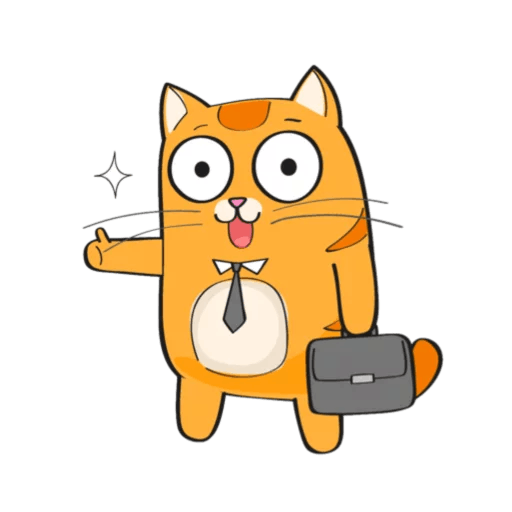

Почему-то в моем ноутбуке стоит норм кот, одобряющий задание, а на гитхабе вместо него постоянно загружается формула из вольфрама. Ну, будем считать, что это одобряющая формула.